<h1 style="text-align:center;">Building makemore (I) : Language modeling </h1>



# Loading the data

In [1]:
words = open("names.txt", 'r').read().splitlines()

In [2]:
# Print the first 10 tokens (ames for this example)
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
# Total number of tockens
len(words)

32033

In [4]:
# Shortest tocken (name)
min(len(w) for w in words)

2

In [5]:
# check out the shortest name
for w in words :
    if len(w) == 2 :
        print(w)

an
jo
bo
zo
vy
eh
vi
mi
io
kc
ty
fe
ma
my
sa
ky
lo
lu
mj
tu
xi
bo
ty
om
aj
cy
oz
jj
ky
an
rj
tj
md
jr
al
eh
cj
yi
kc
dj
mj
ra
jc
jd
kj
ed
sy
yu
ej
ry
jw
jp
jt
ki
lj
ao
do
jo
ku
vu
zo
zy
jb
la
qi


In [6]:
# Longest tocken (name)
max(len(w) for w in words)

15

In [7]:
# check out the longest name
for w in words :
    if len(w) == 15 :
        print(w)

muhammadibrahim
muhammadmustafa


In [8]:
# build a dictionary to store bigrams with their frequencies
b = {}

for w in words :
    # S for special start token, and E for a special End token
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]) :
        bigram = (ch1, ch2)   # a bigram is a tuple of 2 characters ---> couple
        b[bigram] = b.get(bigram, 0) + 1 #b.get(bigram, 0) is same as b[bigram] but if bigram not in b, it will return 0

In [9]:
# Counting the occurences of 2 characters (bigrams)
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

We can see that 'n' is more likely an Ending character.

Instead of using a dictionary, we want actually to use a 2D array. So, we're going to use PyTorch.

In [10]:
#!pip install torch torchvision

In [11]:
import torch

In [12]:
# Because we have 26 alphabetic letters + 1 special character('.') that replaces <'S'> and <'E'>),
#we are counting the occurences (so we use integers)

N = torch.zeros((27,27), dtype = torch.int32)

In [13]:
N

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],


In [16]:
# 1) We transform the whole text that we loaded into a long string(''.join)
# 2) Then we choose unique characters using 'set()', convert it to a list then sort it:
chars = sorted(list(set(''.join(words))))


# Encoder : convert string to integer
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
print(f"The encoder (string to integer) that we're going to work with is :\n{stoi}\n")

# Decoder : convert integer to string
itos = {i:s for s,i in stoi.items()}
print(f"The decoder (integer to string) that we're going to work with is :\n{itos}\n")

print(f"The vocabulary of size {len(itos)} we're working with is :\n{itos.values()}\n")

The encoder (string to integer) that we're going to work with is :
{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}

The decoder (integer to string) that we're going to work with is :
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}

The vocabulary of size 27 we're working with is :
dict_values(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '.'])



Let's a matrix $N$ which contains the occurrences of each bigram, which means that ou $N$ matrix will be of shape $27\times 27$

In [30]:
for w in words :
    # dismantling the word "w" into characters with the special character '.' in begining and end
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]) :
        # Row index
        ix1 = stoi[ch1]
        # Column index
        ix2 = stoi[ch2]
        # Counting the occurences of the specific bigram
        N[ix1, ix2] += 1

In [31]:
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

In [32]:
N.shape

torch.Size([27, 27])

In [33]:
N[1,1].item()

556

To visualize it more nicer, we're going to use `matplotlib` :

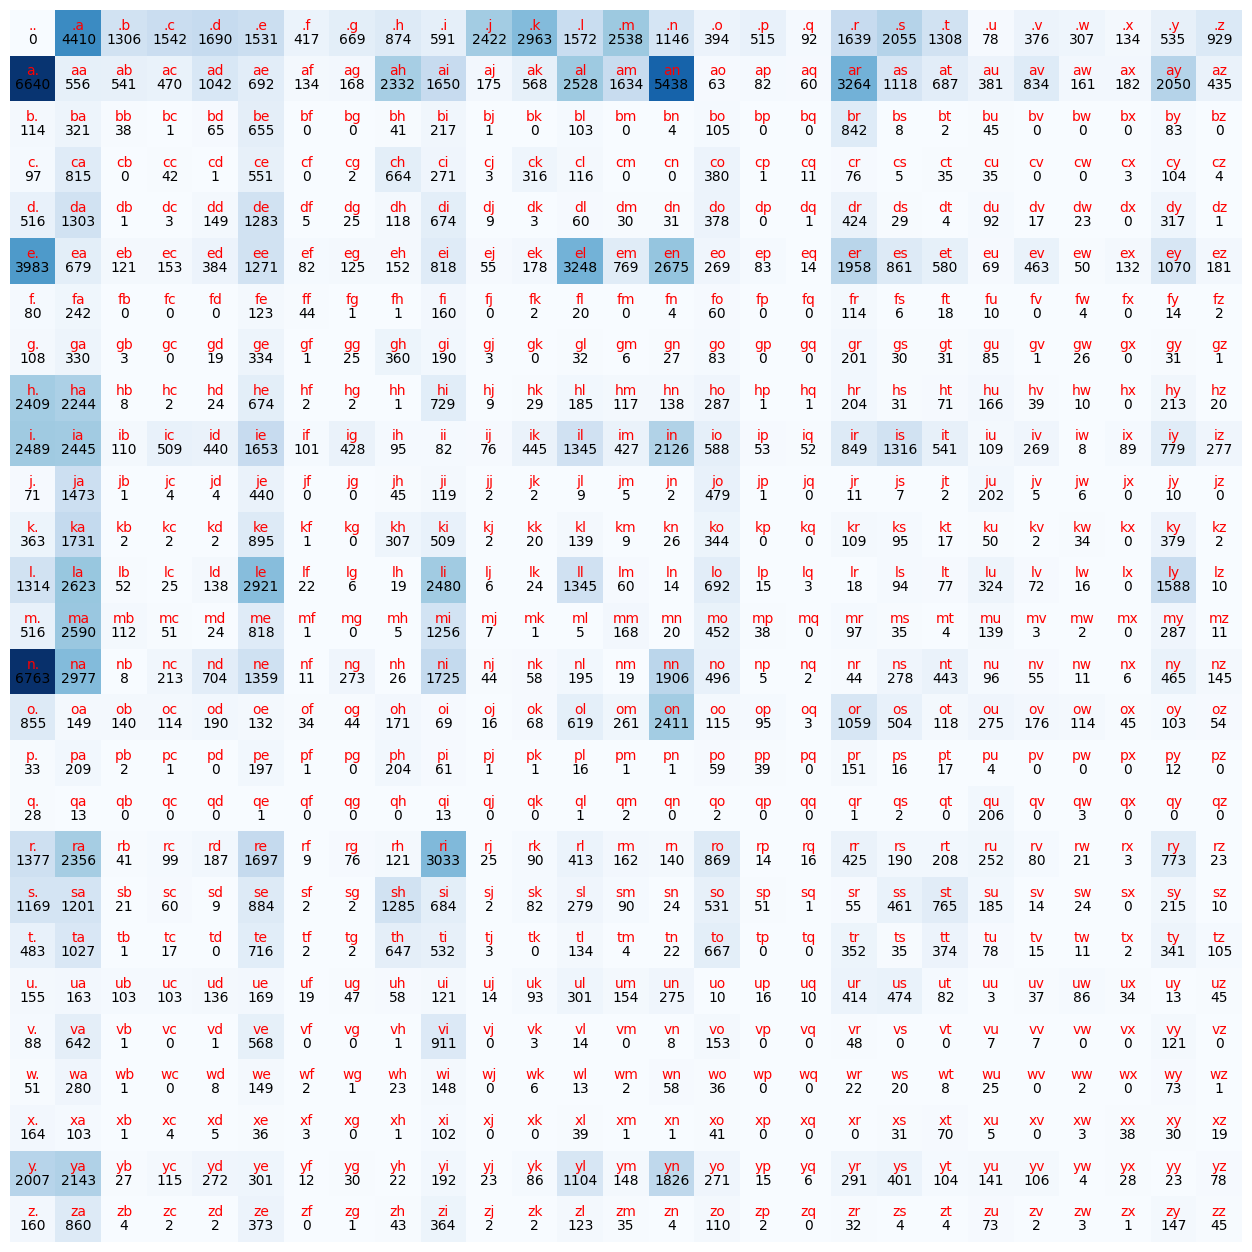

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')

for i in range(N.shape[0]):
    for j in range(N.shape[1]):
        chstr = itos[i] + itos[j] # bigrams
        plt.text(j, i, chstr, ha="center", va="bottom", color='red')
        # Since N[i,j] is a tensor, we want to extract the content, we do it with .item()
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='black')
plt.axis('off');

In [41]:
# first row
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [42]:
# Probabilities of occurences of the different bigrams in the first row
p = N[0].float()
p /= p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [43]:
# sum(probabilities) = 1
p.sum()

tensor(1.)

**REMARK :** We can say that $N$ is a stochastic matrix (Markov chain)

In the provided code snippet, `g` is an instance of `torch.Generator` that is used to control the randomness of the generated values. By setting a seed for the generator, we ensure that the random numbers generated by PyTorch are reproducible.

Here's a breakdown of the role of `g`:

* **torch.Generator :** This class in PyTorch provides functionality for generating random numbers. We can create an instance of `torch.Generator` using various methods.

* **manual_seed :** The `.manual_seed()` method sets the seed for the random number generator. By setting the seed to a specific value (in this case, 25101989), we ensure that the sequence of random numbers generated by the generator will be the same every time our code is run with the same seed.

* **generator=g :** The generator argument specifies the generator to be used for generating random numbers. By passing the `g` generator instance to the generator argument when calling `torch.randn()`, we ensure that the random numbers generated by `torch.randn()` will be reproducible based on the seed set for `g`.

In summary, `g` is used to control the randomness of the generated values by setting a seed for the random number generator. This ensures that the random numbers generated by `torch.randn()` will be consistent and reproducible across different runs of the code, which can be crucial for debugging, testing, and ensuring consistent results in machine learning experiments.

In [44]:
# Initialize a random number generator with a specific seed value for reproducibility
g = torch.Generator().manual_seed(25101989)

# Sample from a multinomial distribution defined by probabilities 'p', with replacement, using the given generator.
# 'num_samples' is set to 1, so we get a single sample.
ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g)

# Retrieve the token using 'itos' mapping corresponding to the index 'ix'.
# This is typically used in language modeling to convert predicted indices back to tokens.
ix = ix.item()
itos[ix]

'l'

In [47]:
g = torch.Generator().manual_seed(25101989)

# Generate a random tensor of shape (3,) from a uniform distribution between 0 and 1, using the given generator.
p = torch.rand(3, generator=g)
print(p)
p /= p.sum()
print(p)

tensor([0.5518, 0.9234, 0.8955])
tensor([0.2328, 0.3895, 0.3777])


Let's sample from a multinomial distribution defined by probabilities 'p', generating $100$ samples with replacement, `generator=g` specifies the random number generator to use for reproducibility.

The result is a tensor containing the indices of the samples drawn from the multinomial distribution.

In [48]:
torch.multinomial(p, num_samples=100, replacement = True, generator = g)

tensor([1, 1, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 0, 1, 2, 0, 1, 0,
        0, 1, 2, 1, 0, 1, 1, 1, 0, 2, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 2, 1, 2, 1,
        2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 2, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1,
        0, 2, 0, 2, 2, 1, 0, 2, 2, 0, 2, 1, 1, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 0,
        1, 1, 1, 2])

It generates an tensor of shape 100, composed of numbers 0,1,2 (because we previously generated 3 probabilities)  0 ~ 23%, 1 ~ 39% and 2 ~ 38%.

In [49]:
p.shape

torch.Size([3])

Let's build a matrix of probabilities instead.

In [50]:
N.min()

tensor(0, dtype=torch.int32)

In [86]:
# N+1 to get rid of zeros in N (called model smoothing)
P = (N+1).float()

# shape of P is (27,27) ---- > shape of P.sum(1) is (27)
# but with "keepdim = True" we kept the dim as (27,1)
# the division will then be done element-wise after it copies the column 26 times, so we have 27 equal columns
P /= P.sum(1, keepdim = True)

In [54]:
P.shape

torch.Size([27, 27])

In [84]:
P[0].sum().item()

1.0

In [55]:
g = torch.Generator().manual_seed(25101989)

for i in range(5):
    
    out = []
    ix = 0
    while True:
        p = P[ix]
        # we use multinomial because we don't always pick the bigram with the highest probability of occuring
        # using multinomial we pick the outcome (i.e. a character from the characters in the columns)
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:   # wich means the character is "." indicating the end of the word
            break
    print(''.join(out))

leriz.
onaielan.
festnjadl.
anyath.
l.



#### GOAL: is to maximize likelihood of the data w.r.t.(with respect to) model parameters (statistical modeling)
#### $<=>$ maximizing the log likelihood (because log is monotonically increasing)
#### $<=>$ minimizing the negative log likelihood
#### $<=>$ minimizing the average negative log likelihood

And we know that : $$log(a\times b\times c) = log(a) + log(b) + log(c)$$

In [93]:
log_likelihood = 0.0
n = 0

for w in words :
#for w in ['younes'] :
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]) :
        ix1 = stoi[ch1]   # index of the first character in the bigram
        ix2 = stoi[ch2]   # index of the second character in the bigram
        prob = P[ix1, ix2]  # the proba of the bigram occurring
        logprob = torch.log(prob)
        log_likelihood += logprob
        n +=1
        #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood # negative log likelihood
print(f'{nll=}')
print(f'{nll/n}')  # average negative log likelihood (the loss fct)

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


Our goal, is to minimize the loss function that we choose here as the average negative log likelihood.

In [56]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:  # First token (Emma)
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]   #index of the 1st character of the bigram
        ix2 = stoi[ch2]   #index of the 2nd character of the bigram
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
    
# Convert lists into tensors
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [95]:
xs

tensor([ 0,  5, 13, 13,  1])

In [96]:
ys

tensor([ 5, 13, 13,  1,  0])

Let's encode `xs`

Since our vocabulary is of size $27$, then the `one_hot` encoding will output elements of size 27 for each character, where coefficient is equal `1` at the index of that letter, and `0` else where.

In [57]:
import torch.nn.functional as F
# x encoded, 27 is the number of possible classes, and we cast as float
xenc = F.one_hot(xs, num_classes = 27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [58]:
# xs has 5 elemets ---One Hot Encoding---> (5,27)
xenc.shape

torch.Size([5, 27])

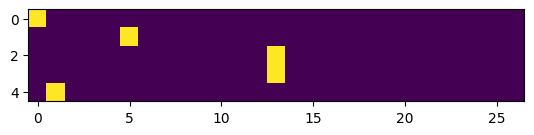

In [59]:
# yellows are 1's
plt.imshow(xenc)

In [60]:
xenc.dtype

torch.float32

In [61]:
# Weights W, 27 weights for each 27 neurones

W = torch.rand((27,27))  #(encoding dim, nb of neurons)
xenc @ W  # matrix multiplication (5,27) @ (27,27) ----> (5,27)

tensor([[0.8647, 0.2141, 0.3233, 0.1251, 0.6759, 0.2795, 0.7879, 0.9014, 0.3827,
         0.1445, 0.0504, 0.1573, 0.4438, 0.2709, 0.5236, 0.5442, 0.2628, 0.0888,
         0.4047, 0.9943, 0.0241, 0.4688, 0.4390, 0.1797, 0.5908, 0.6781, 0.2367],
        [0.6689, 0.7803, 0.5570, 0.4517, 0.9416, 0.5483, 0.8294, 0.7456, 0.9816,
         0.2878, 0.6142, 0.3247, 0.0404, 0.0502, 0.3640, 0.1623, 0.3066, 0.2398,
         0.0805, 0.4278, 0.1482, 0.2777, 0.0109, 0.5773, 0.9107, 0.5560, 0.5237],
        [0.7384, 0.3943, 0.3550, 0.0081, 0.9696, 0.6005, 0.7494, 0.1249, 0.4840,
         0.3967, 0.6615, 0.6020, 0.7160, 0.5333, 0.0307, 0.3564, 0.9493, 0.4327,
         0.8035, 0.2791, 0.8776, 0.9892, 0.9267, 0.1893, 0.4007, 0.6437, 0.1780],
        [0.7384, 0.3943, 0.3550, 0.0081, 0.9696, 0.6005, 0.7494, 0.1249, 0.4840,
         0.3967, 0.6615, 0.6020, 0.7160, 0.5333, 0.0307, 0.3564, 0.9493, 0.4327,
         0.8035, 0.2791, 0.8776, 0.9892, 0.9267, 0.1893, 0.4007, 0.6437, 0.1780],
        [0.6565, 0.0240,

In [62]:
logits = xenc @ W  # Log-counts : (5,27) @ (27,27) ----> (5,27)
counts = logits.exp()   #equivalent to N  # shape(5,27)
probs = counts / counts.sum(1, keepdims =True) # shape(5,27)
probs

tensor([[0.0562, 0.0293, 0.0327, 0.0268, 0.0466, 0.0313, 0.0521, 0.0584, 0.0347,
         0.0274, 0.0249, 0.0277, 0.0369, 0.0311, 0.0400, 0.0408, 0.0308, 0.0259,
         0.0355, 0.0640, 0.0243, 0.0379, 0.0367, 0.0284, 0.0428, 0.0467, 0.0300],
        [0.0438, 0.0490, 0.0392, 0.0353, 0.0576, 0.0389, 0.0515, 0.0473, 0.0599,
         0.0299, 0.0415, 0.0311, 0.0234, 0.0236, 0.0323, 0.0264, 0.0305, 0.0285,
         0.0243, 0.0344, 0.0260, 0.0297, 0.0227, 0.0400, 0.0558, 0.0392, 0.0379],
        [0.0437, 0.0310, 0.0298, 0.0210, 0.0550, 0.0381, 0.0442, 0.0237, 0.0339,
         0.0310, 0.0405, 0.0381, 0.0427, 0.0356, 0.0215, 0.0298, 0.0539, 0.0322,
         0.0466, 0.0276, 0.0502, 0.0561, 0.0527, 0.0252, 0.0312, 0.0397, 0.0249],
        [0.0437, 0.0310, 0.0298, 0.0210, 0.0550, 0.0381, 0.0442, 0.0237, 0.0339,
         0.0310, 0.0405, 0.0381, 0.0427, 0.0356, 0.0215, 0.0298, 0.0539, 0.0322,
         0.0466, 0.0276, 0.0502, 0.0561, 0.0527, 0.0252, 0.0312, 0.0397, 0.0249],
        [0.0457, 0.0243,

In [64]:
# feeding '.' [0,0,...,0] to the NN
# probs[0] represents the probabilities of each character coming next, right after '.'
probs[0]

tensor([0.0562, 0.0293, 0.0327, 0.0268, 0.0466, 0.0313, 0.0521, 0.0584, 0.0347,
        0.0274, 0.0249, 0.0277, 0.0369, 0.0311, 0.0400, 0.0408, 0.0308, 0.0259,
        0.0355, 0.0640, 0.0243, 0.0379, 0.0367, 0.0284, 0.0428, 0.0467, 0.0300])

In [65]:
probs[0].shape

torch.Size([27])

In [66]:
probs[0].sum()

tensor(1.)

#### GOAL : is to optimize the weights W so that the probabilities are pretty good, using the loss function

## Summary

In [112]:
xs 

tensor([ 0,  5, 13, 13,  1])

In [113]:
ys

tensor([ 5, 13, 13,  1,  0])

In [75]:
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [67]:
# Randomly initialize 27 neurons' weights, each neuron receives 27 inputs (because of the one_hot encoding)
g = torch.Generator().manual_seed(25101989)
W = torch.randn((27,27), generator = g)

In [68]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding 
logits = xenc @ W # predict log-counts

counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character

#### Remark : the last 2 lines from last code, combined together are called a 'softmax'

The softmax function, denoted as $ \text{softmax}(x) $, takes as input a vector $ x = [x_1, x_2, \ldots, x_n] $ and outputs a probability distribution over the elements of the vector. It is defined as follows:

$$\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}$$

for $ i = 1, 2, \ldots, n $, where $ e $ is the base of the natural logarithm (Euler's number), $ x_i $ is the $i $-th element of the input vector $x$, and $n $ is the total number of elements in $x$.

The softmax function exponentiates each element of the input vector and then normalizes these exponentiated values by dividing by the sum of all exponentiated values in the vector. This normalization ensures that the output values lie in the range $[0, 1]$ and sum up to $1$, making them interpretable as probabilities. The output of the softmax function represents the probability distribution over the possible values of the input vector $ x $.


In [69]:
probs.shape

torch.Size([5, 27])

In [74]:
# negative log likelihood
nlls = torch.zeros(5)

for i in range(5):
    # i-th bigram:
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print('--------')
    print(f"bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})")
    print("input to the neural network:", x)
    print("output probabilities from the neural network:", probs[i])
    print("label (actual next character):", y)
    p = probs[i, y]
    print("probability assigned by the network to the the correct character:", p.item())
    logp = torch.log(p)
    print("log likelihood:", logp.item())
    nll = -logp
    print("negative log likelihood:", nll.item())
    nlls[i] = nll

print("============")
print("average negative log likelihood, i.e. loss =", nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural network: 0
output probabilities from the neural network: tensor([0.0463, 0.0937, 0.0023, 0.0178, 0.0882, 0.0198, 0.0183, 0.0615, 0.0455,
        0.0926, 0.0264, 0.0551, 0.0087, 0.0040, 0.0889, 0.0300, 0.0307, 0.0149,
        0.0023, 0.0597, 0.0738, 0.0147, 0.0261, 0.0134, 0.0299, 0.0158, 0.0196])
label (actual next character): 5
probability assigned by the network to the the correct character: 0.019821705296635628
log likelihood: -3.9209775924682617
negative log likelihood: 3.9209775924682617
--------
bigram example 2: em (indexes 5,13)
input to the neural network: 5
output probabilities from the neural network: tensor([0.0313, 0.0398, 0.0133, 0.0330, 0.0207, 0.0114, 0.0343, 0.0035, 0.0599,
        0.1051, 0.0262, 0.0179, 0.0561, 0.0552, 0.1367, 0.0461, 0.0178, 0.0491,
        0.0185, 0.0049, 0.0215, 0.0902, 0.0096, 0.0184, 0.0373, 0.0225, 0.0195])
label (actual next character): 13
probability assigned by the network to th

## Optimization

Like we said before, our goal is to optimize the weights $W$ so that the probabilities are pretty good, using the loss function.

In [135]:
xs

tensor([ 0,  5, 13, 13,  1])

In [136]:
ys

tensor([ 5, 13, 13,  1,  0])

In [137]:
probs.shape

torch.Size([5, 27])

Below, we can see the probabilities assigned by the model to the ground truths (i.e. the true labels) :

In [138]:
# equivalent to : probs[0,5], probs[1,13], probs[2,13], probs[3,1], probs[4,5] :
probs[torch.arange(5), ys]

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150], grad_fn=<IndexBackward0>)

So, our goal is to maximize these probabilities, which is equivalent to minimizing the average negative log likelihood :

In [76]:
# we choose our loss as the avg nll
loss = -probs[torch.arange(5), ys].log().mean()
loss

tensor(3.8186)

In [78]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs (because of the one-hot encoding)
g = torch.Generator().manual_seed(25101989)  # for repoducibility
W = torch.randn((27, 27), generator=g, requires_grad=True) # the weights

In [87]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [88]:
print(loss.item())

3.8186352252960205


In [89]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [90]:
W.shape

torch.Size([27, 27])

In [91]:
W.grad.shape

torch.Size([27, 27])

In [92]:
W.grad

tensor([[ 0.0093,  0.0187,  0.0005,  0.0036,  0.0176, -0.1960,  0.0037,  0.0123,
          0.0091,  0.0185,  0.0053,  0.0110,  0.0017,  0.0008,  0.0178,  0.0060,
          0.0061,  0.0030,  0.0005,  0.0119,  0.0148,  0.0029,  0.0052,  0.0027,
          0.0060,  0.0032,  0.0039],
        [-0.1955,  0.0134,  0.0108,  0.0028,  0.0022,  0.0089,  0.0118,  0.0031,
          0.0028,  0.0019,  0.0264,  0.0047,  0.0042,  0.0023,  0.0040,  0.0010,
          0.0030,  0.0059,  0.0017,  0.0013,  0.0033,  0.0058,  0.0104,  0.0276,
          0.0110,  0.0055,  0.0197],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [93]:
# Updating the W
# step size is 0.1
W.data += -0.1 * W.grad

In [94]:
print(loss.item())

3.8186352252960205


In [95]:
W

tensor([[ 0.9040,  1.6070, -2.0975, -0.0494,  1.5474,  0.0756, -0.0254,  1.1868,
          0.8858,  1.5953,  0.3419,  1.0774, -0.7628, -1.5555,  1.5554,  0.4693,
          0.4936, -0.2326, -2.0977,  1.1576,  1.3692, -0.2444,  0.3296, -0.3358,
          0.4648, -0.1682,  0.0434],
        [-0.1633,  0.9164,  0.7024, -0.6676, -0.8889,  0.5038,  0.7831, -0.5489,
         -0.6402, -1.0571,  1.5912, -0.1383, -0.2377, -0.8576, -0.2816, -1.6653,
         -0.5727,  0.0972, -1.1709, -1.3986, -0.4846,  0.0716,  0.6593,  1.6369,
          0.7187,  0.0279,  1.2976],
        [ 0.7511,  1.4795,  0.2232,  1.2541,  0.3485, -0.6702,  0.4211,  0.6877,
          0.5223, -0.5929,  0.3313, -0.8383,  0.2386, -0.0104, -0.5770,  0.8848,
         -1.1977, -0.4970,  0.0741, -0.6972,  1.5279, -0.7863,  0.4395,  0.2191,
         -0.2250, -0.9567,  0.1752],
        [-0.3455, -0.3814, -0.0199,  0.9099,  0.2614, -1.0601, -0.0304, -0.4147,
         -0.4527,  0.8472, -0.2433, -0.7490,  0.1053, -0.1910, -0.6007, -0.2307

## Final Summary

In [96]:
# create the dataset
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [97]:
# gradient descent
for k in range(100):
  
  # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean() #+ 0.01*(W**2).mean() represent the regularization loss
  # probs[torch.arange(num), ys] : is the probability assigned by the model to the ground truth (true label y)
    print(loss.item())
  
  # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()
  
  # update the parameters
    W.data += -50 * W.grad

3.768618583679199
3.378807306289673
3.161090850830078
3.0271859169006348
2.9344842433929443
2.867231607437134
2.8166542053222656
2.777146339416504
2.745253801345825
2.7188305854797363
2.696505308151245
2.6773722171783447
2.6608052253723145
2.6463515758514404
2.633664846420288
2.622471570968628
2.6125476360321045
2.6037068367004395
2.595794439315796
2.5886809825897217
2.5822560787200928
2.5764293670654297
2.5711236000061035
2.566272735595703
2.5618226528167725
2.5577263832092285
2.5539438724517822
2.550442695617676
2.5471925735473633
2.5441699028015137
2.5413525104522705
2.538721799850464
2.536262273788452
2.5339579582214355
2.531797409057617
2.529768228530884
2.527860164642334
2.5260636806488037
2.5243709087371826
2.522773027420044
2.52126407623291
2.519836902618408
2.5184857845306396
2.5172054767608643
2.5159904956817627
2.5148375034332275
2.5137407779693604
2.51269793510437
2.511704921722412
2.5107579231262207
2.509854793548584
2.5089924335479736
2.5081686973571777
2.507380247116089


In [98]:
# finally, sample from the 'neural network' model
g = torch.Generator().manual_seed(25101989)

for i in range(5): # generate 5 examples
    
    out = [] # list containing the characters of the output word
    ix = 0
    while True:
        # ----------
        # BEFORE (method 1):
        #p = P[ix]
        # ----------
        # NOW (method 2):
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W # predict log-counts
        counts = logits.exp() # counts, equivalent to N
        p = counts / counts.sum(1, keepdims=True) # probabilities for next character
        # ----------
        
        # extract the index of the next character
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        # map the index to its character, and add it to the out list
        out.append(itos[ix])
        if ix == 0: # wich means the character is "." indicating the end of the word
            break
    print(''.join(out))  # out the word

leriz.
onaielan.
festnjadl.
anyath.
l.


[Younes Dahami](https://www.linkedin.com/in/dahami/)